In [4]:
# roi_glass_brain.py
import os
import glob
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

from nilearn import plotting


Saved glass brain to /home/neel/Desktop/MOUS_hierarchical-representations/figures/auto_rois/glass_brain_rois.png
Saved legend to /home/neel/Desktop/MOUS_hierarchical-representations/figures/auto_rois/glass_brain_legend.png


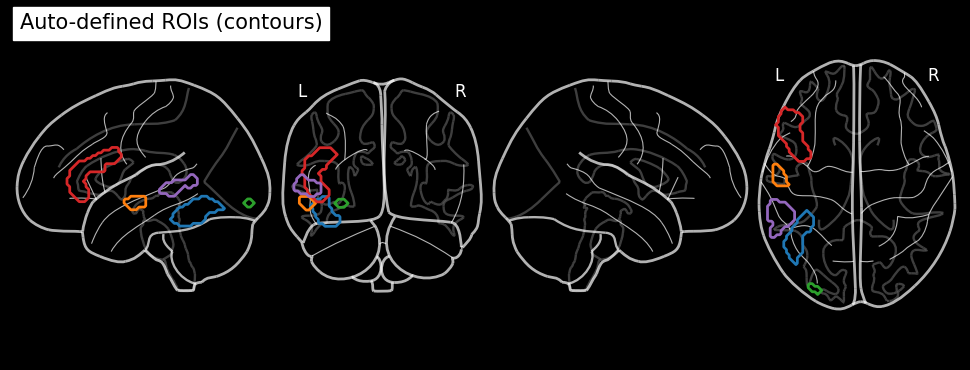

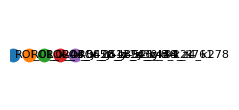

In [6]:


# --- paths ---
roi_dir = "/home/neel/Desktop/MOUS_hierarchical-representations/figures/auto_rois"                 # adjust if needed
out_png = os.path.join(roi_dir, "glass_brain_rois.png")
legend_png = os.path.join(roi_dir, "glass_brain_legend.png")

# Collect ROI masks
roi_paths = sorted(glob.glob(os.path.join(roi_dir, "ROI_*.nii")))
if not roi_paths:
    raise FileNotFoundError(f"No ROI_*.nii found in {roi_dir}")

# Color cycle (don’t stress exact match to violins)
color_cycle = plt.rcParams["axes.prop_cycle"].by_key().get("color", ["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"])
colors = [color_cycle[i % len(color_cycle)] for i in range(len(roi_paths))]

# Create glass brain
display = plotting.plot_glass_brain(
    None, display_mode="lyrz", black_bg=True, title="Auto-defined ROIs (contours)"
)

# Add each ROI as a contour (clean outlines on glass brain)
for roi_path, color in zip(roi_paths, colors):
    img = nib.load(roi_path)  # 3D nifti, binary mask
    # If masks are 0/1, a low-level (e.g., level=0.5) contour works well
    display.add_contours(img, levels=[0.5], colors=[color], linewidths=2)

# Save the glass brain image
display.savefig(out_png, dpi=300)
print(f"Saved glass brain to {out_png}")

# ----- Optional: separate legend image -----
labels = [os.path.basename(p).replace(".nii", "") for p in roi_paths]
plt.figure(figsize=(min(12, 0.25*len(labels)+2), 1.2))
ax = plt.gca()
ax.axis("off")
x = 0.5
for lab, color in zip(labels, colors):
    ax.scatter([x], [0.5], s=80, color=color)
    ax.text(x+0.15, 0.5, lab, va="center", fontsize=8)
    x += 1.2
plt.tight_layout()
plt.savefig(legend_png, dpi=300, bbox_inches="tight")
print(f"Saved legend to {legend_png}")
plt.show()